<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E5%86%B3%E7%AD%96%E6%A0%91Overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [4]:
#产生一个随机数
rng = np.random.RandomState(1)
X = np.sort(10*rng.rand(80,1),axis =0)
y = np.sin(X).ravel()
#print(y)
y[::5] += 3*(0.5-rng.rand(16))

[ 0.00114375  0.18186502  0.19246116  0.27046493  0.38069505  0.47901705
  0.50865808  0.75157212  0.79764833  0.83242431  0.85385354  0.85846032
  0.96363458  0.98084381  0.98419397  0.98610002  0.99464756  0.99467575
  0.99657853  0.99188188  0.95772594  0.91703368  0.88987457  0.85487584
  0.46720426  0.33080147  0.26078888  0.20400886  0.11799142  0.00735081
 -0.01356324 -0.30887942 -0.32977567 -0.73528161 -0.74141444 -0.84091253
 -0.84157905 -0.85659154 -0.85804733 -0.86759856 -0.87695245 -0.97287322
 -0.97939703 -0.906236   -0.81430595 -0.79815184 -0.78022032 -0.64137341
 -0.51585831 -0.40559977 -0.38030859  0.34736639  0.40912032  0.48395623
  0.53879805  0.54954871  0.59364905  0.59722821  0.61376149  0.65516295
  0.79563774  0.8287076   0.93148404  0.93849925  0.94078405  0.99924692
  0.98824748  0.97591245  0.88125986  0.61381689  0.60008199  0.59988145
  0.46063574  0.38089013  0.33237717  0.14913374 -0.02116802 -0.15350796
 -0.25499042 -0.44737934]


array([ 0.00114375,  0.47901705,  0.85385354,  0.98610002,  0.95772594,
        0.33080147, -0.01356324, -0.84091253, -0.87695245, -0.79815184,
       -0.38030859,  0.54954871,  0.79563774,  0.99924692,  0.60008199,
        0.14913374])

In [7]:
# 构建不同深度的决策树
clf_0 = DecisionTreeRegressor(max_depth=1)
clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=3)
clf_3 = DecisionTreeRegressor(max_depth=4)
clf_0.fit(X, y)
clf_1.fit(X, y)
clf_2.fit(X, y)
clf_3.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
# 创建预测模拟数据
X_test = np.arange(0.0, 10, 0.01)[:, np.newaxis]
y_0 = clf_0.predict(X_test)
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)
y_3 = clf_3.predict(X_test)

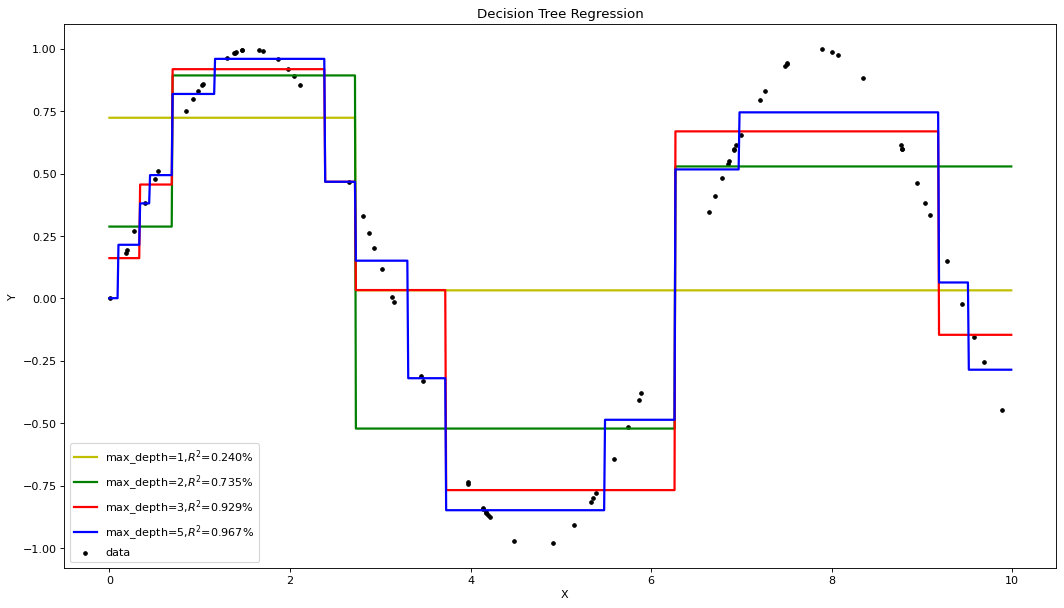

In [9]:
# 图表展示
plt.figure(figsize=(16, 9), dpi=80, facecolor='w')
plt.scatter(X, y, c="k", s=10, label="data")
plt.plot(X_test, y_0, c="y", label="max_depth=1,$R^2$=%.3f%%" % (clf_0.score(X, y)), linewidth=2)
plt.plot(X_test, y_1, c="g", label="max_depth=2,$R^2$=%.3f%%" % (clf_1.score(X, y)), linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=3,$R^2$=%.3f%%" % (clf_2.score(X, y)), linewidth=2)
plt.plot(X_test, y_3, c="b", label="max_depth=5,$R^2$=%.3f%%" % (clf_3.score(X, y)), linewidth=2)
plt.xlabel("X", horizontalalignment="left")
plt.ylabel("Y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [10]:
# 分类算法比较
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV

In [11]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [18]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.4, random_state=1),
            linearly_separable
            ]
names = ["Nearest Neighbors", "Logistic", "Decision Tree", "Random Forest", "AdaBoost", "GBDT"]

In [19]:
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegressionCV(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=10, learning_rate=1.5),
    GradientBoostingClassifier(n_estimators=10, learning_rate=1.5)
]

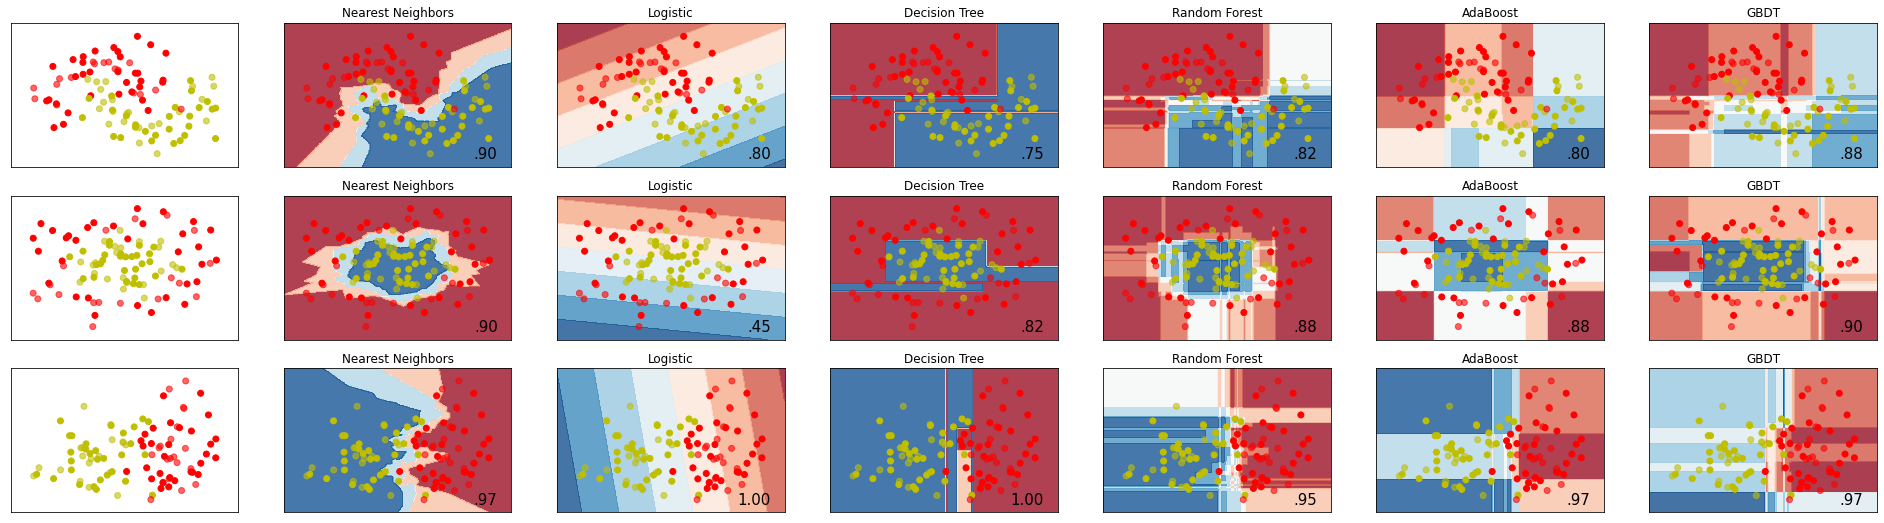

In [20]:
figure = plt.figure(figsize=(27, 9), facecolor='w')
i = 1
h = .02  # 步长

for ds in datasets:
    X, y = ds

    X = StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['r', 'b', 'y'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # 画每个算法的图
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

# 展示图
figure.subplots_adjust(left=.02, right=.98)
plt.show()
